# Steps used in this Task Completion


1️) Upload & Load Dataset
* Upload the CSV file and read it into a pandas DataFrame.
* Display dataset info (columns, data types, missing values).

2️) Handling Missing Values
* Uses interpolation instead of dropping missing values to ensure better analysis.

3️) Convert Date & Extract Features
* Converts date column into datetime format.
* Extracts year, month, and season for seasonal analysis.

4️) Compute AQI (If Missing)
* If AQI is not present in the dataset, it is calculated using a formula based on PM2.5, PM10, NO2, SO2, and CO.

5️) Key Pollutants Analysis
* Identifies major pollutants (PM2.5, PM10, NO2, SO2, CO, O3, NH3).
* Uses box plots to visualize their distribution.

6️) Seasonal Variation in AQI
* Analyzes how AQI levels change across seasons using boxplots.

7️) Correlation Analysis Between Pollutants & AQI
* Computes correlation matrix to identify relationships between pollutants and AQI.
* Uses a heatmap for better visualization.

8️) Impact of External Factors (Temperature & Wind Speed)
* If temperature & wind speed data are available, their impact on AQI is analyzed using scatter plots.

9️) Outlier Detection (Extreme Pollution Days)
* Identifies unusually high AQI days using Z-score analysis.
* Prints out dates of extreme pollution events.

10) Geographical Heatmap of AQI
* If latitude & longitude are available, an interactive heatmap is created using Folium.
* Heatmap is saved as Delhi_AQI_Heatmap.html.

1️1) Time-Series Analysis of AQI Trends
* Uses a line plot to show how AQI has changed over time.

1️2) Trend Analysis with Moving Averages
* Applies a 7-day moving average to smooth AQI fluctuations over time.

1️3) Identifying Worst Air Quality Months
* Finds and visualizes the most polluted months based on monthly AQI averages.

In [ ]:
#step 1 :Upload & Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import zscore
from google.colab import files

# Upload file
uploaded = files.upload()

# Load dataset
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
df.info()
print(df.head())


Saving delhiaqi.csv to delhiaqi.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12

In [ ]:
# Step 2: Handling Missing Values
df = df.interpolate()  # Fill missing values with interpolation
print("Missing values handled. Updated dataset info:")
df.info()


Missing values handled. Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


<ipython-input-3-40f331b61dca>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()  # Fill missing values with interpolation


In [ ]:
# Step 3: Convert Date Column & Extract Features

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['month'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer',
                                9:'Monsoon', 10:'Monsoon', 11:'Monsoon'})
print("Date column converted. Year, Month, and Season extracted.")


Date column converted. Year, Month, and Season extracted.


In [ ]:
# Step 4: Compute AQI (If Missing)

if 'AQI' not in df.columns:
    df['AQI'] = (df['pm2_5'] * 0.5 + df['pm10'] * 0.3 + df['no2'] * 0.1 + df['so2'] * 0.05 + df['co'] * 0.05)
    print("AQI computed using an estimated formula.")


AQI computed using an estimated formula.


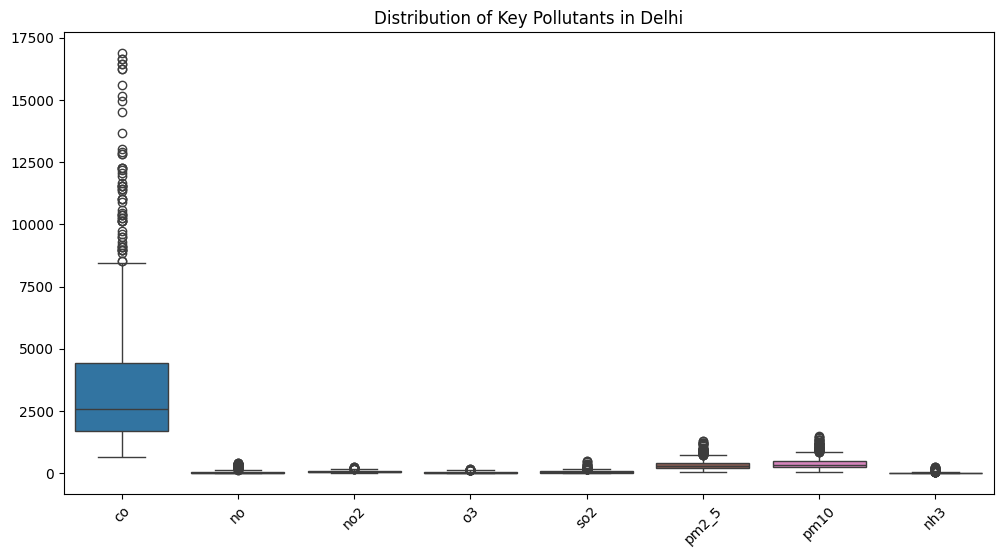

In [ ]:
#Step 5: Key Pollutants Analysis

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[pollutants])
plt.title('Distribution of Key Pollutants in Delhi')
plt.xticks(rotation=45)
plt.show()


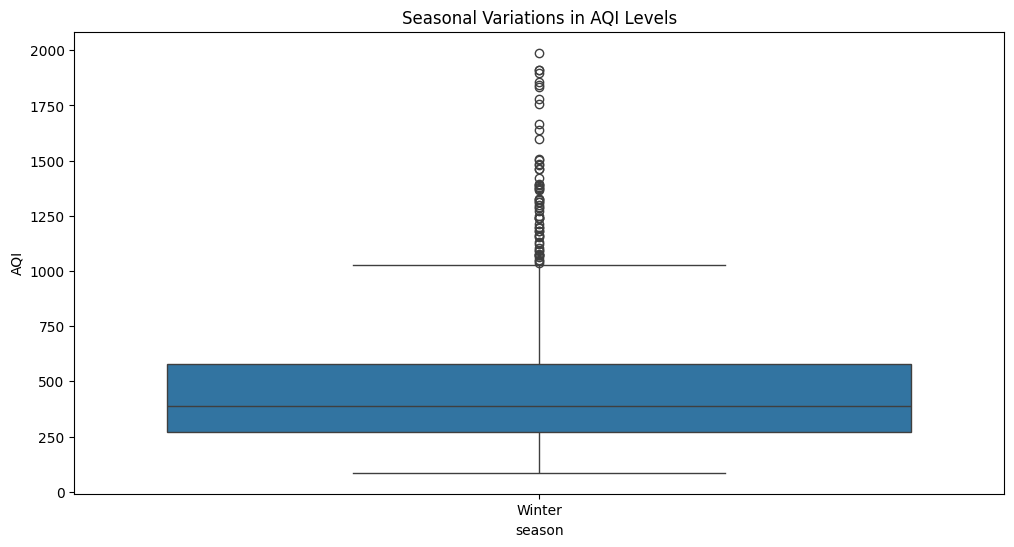

In [ ]:
# Step 6: Seasonal Variation in AQI
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='AQI', data=df)
plt.title('Seasonal Variations in AQI Levels')
plt.show()


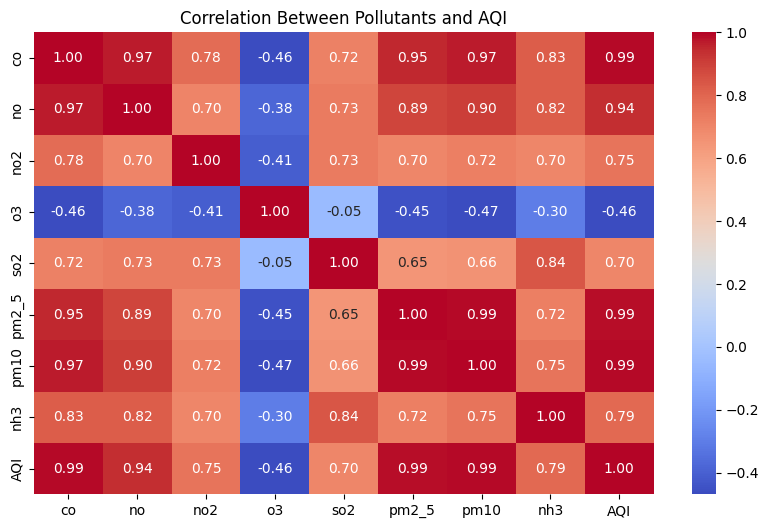

In [ ]:
# Step 7: Correlation Analysis Between Pollutants and AQI
correlations = df[pollutants + ['AQI']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.show()


In [ ]:
# Step 8: Impact of External Factors (Temperature & Wind Speed)
if 'temperature' in df.columns and 'wind_speed' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df['temperature'], y=df['AQI'], label='Temperature')
    sns.scatterplot(x=df['wind_speed'], y=df['AQI'], label='Wind Speed')
    plt.title('Impact of Temperature & Wind Speed on AQI')
    plt.legend()
    plt.show()


In [ ]:
#Step 9: Outlier Detection (Extreme Pollution Days)
df['zscore_AQI'] = zscore(df['AQI'])
outliers = df[df['zscore_AQI'] > 3]
print(f"Number of Extreme AQI Days Detected: {len(outliers)}")
print(outliers[['date', 'AQI']])


Number of Extreme AQI Days Detected: 12
                   date        AQI
303 2023-01-13 15:00:00  1596.8935
304 2023-01-13 16:00:00  1779.5235
305 2023-01-13 17:00:00  1895.5075
306 2023-01-13 18:00:00  1909.6945
307 2023-01-13 19:00:00  1854.7060
308 2023-01-13 20:00:00  1834.4330
309 2023-01-13 21:00:00  1666.8060
446 2023-01-19 14:00:00  1640.4345
447 2023-01-19 15:00:00  1842.1105
448 2023-01-19 16:00:00  1912.1690
449 2023-01-19 17:00:00  1988.7945
450 2023-01-19 18:00:00  1757.5630


In [ ]:
#Step 10: Geographical Heatmap of AQI
if 'latitude' in df.columns and 'longitude' in df.columns:
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)
    heat_data = list(zip(df['latitude'], df['longitude'], df['AQI']))
    HeatMap(heat_data).add_to(m)
    m.save("Delhi_AQI_Heatmap.html")
    print("Geographical heatmap saved as 'Delhi_AQI_Heatmap.html'")


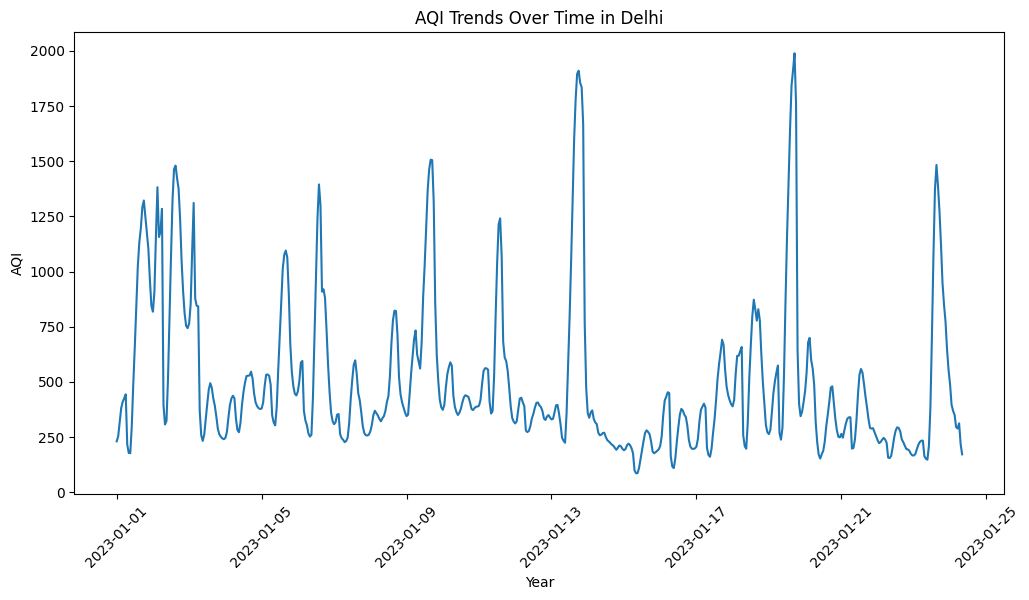

In [ ]:
#Step 11: Time-Series Analysis of AQI Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='AQI', data=df)
plt.title('AQI Trends Over Time in Delhi')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()


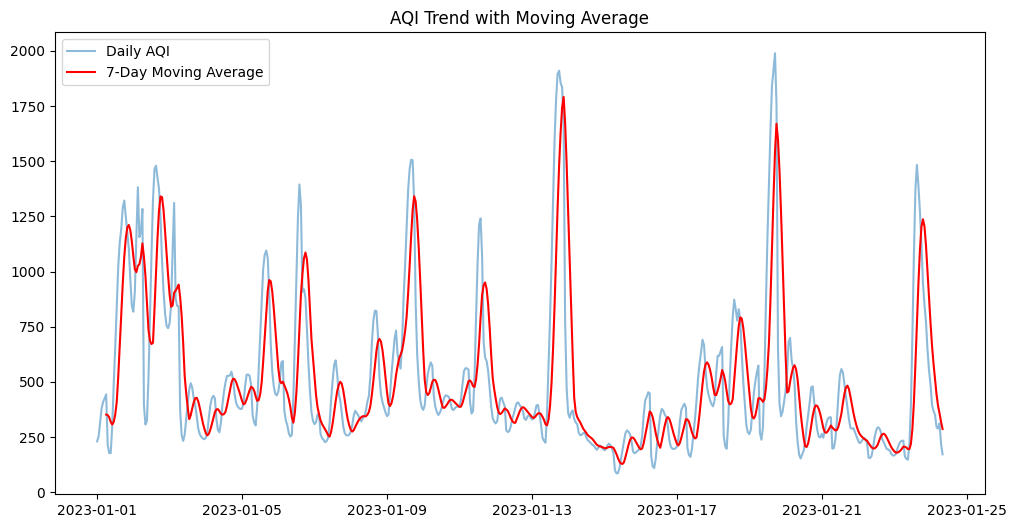

<ipython-input-16-2643ca2c3651>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_monthly_avg.index, y=aqi_monthly_avg.values, palette='coolwarm')


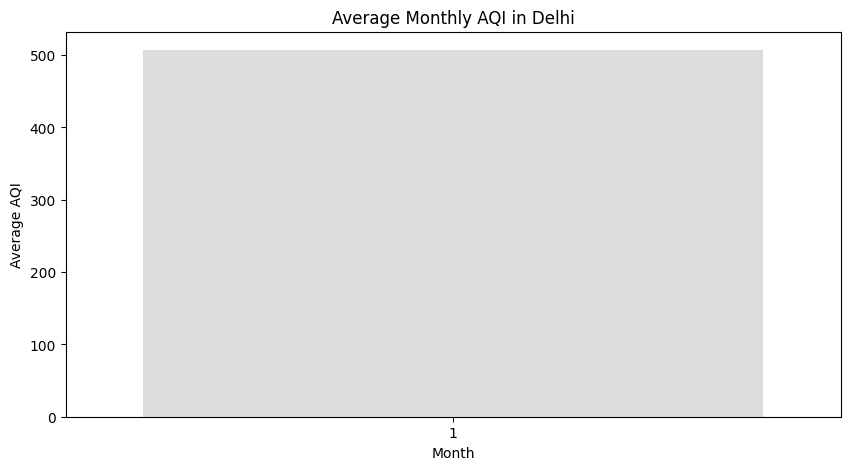

In [ ]:
#Step 12: Trend Analysis with Moving Averages & Identifying Worst Air Quality Months

df['AQI_MA7'] = df['AQI'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['AQI'], label='Daily AQI', alpha=0.5)
plt.plot(df['date'], df['AQI_MA7'], label='7-Day Moving Average', color='red')
plt.title('AQI Trend with Moving Average')
plt.legend()
plt.show()

aqi_monthly_avg = df.groupby('month')['AQI'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=aqi_monthly_avg.index, y=aqi_monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly AQI in Delhi')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

